<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Reading external data & Plotting

[Source](https://blockchain.info/charts/market-price)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The `read_csv` method reads CSV files and accepts many parameters.

In [2]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols=None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace: 'bool' = False,
    skiprows=None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values=None,
    keep_default_na: 'bool' = True,
    na_filter: 'bool' = True,
    verbose: 'bool' = False,
    skip_blank_lines: 'bool' = True,
    parse_dates: 'bool | Sequence[Hashable] | None' = None,
    infer_datetime_format: 'bool | lib.NoDefault' = <no_default>,
    keep_date_col: 'bool' =

In [3]:
df = pd.read_csv("btc-market-price-example.csv")

In [4]:
df

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250
...,...,...
359,2018-03-28 00:00:00,7960.380000
360,2018-03-29 00:00:00,7172.280000
361,2018-03-30 00:00:00,6882.531667
362,2018-03-31 00:00:00,6935.480000


The CSV file we're reading has only two columns: `timestamp` and `price`. It doesn't have a header, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter:

In [5]:
df = pd.read_csv("btc-market-price-example.csv", header=None)
df

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [6]:
df.head(10)

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
5,2017-04-07 00:00:00,1190.454250
6,2017-04-08 00:00:00,1181.149838
7,2017-04-09 00:00:00,1208.800500
8,2017-04-10 00:00:00,1207.744875
9,2017-04-11 00:00:00,1226.617037


In [7]:
df.tail(30)

,0,1
335,2018-03-03 00:00:00,11326.948333
336,2018-03-04 00:00:00,11430.181667
337,2018-03-05 00:00:00,11595.540000
338,2018-03-06 00:00:00,10763.198333
339,2018-03-07 00:00:00,10118.058000
340,2018-03-08 00:00:00,9429.111667
341,2018-03-09 00:00:00,9089.278333
342,2018-03-10 00:00:00,8746.002000
343,2018-03-11 00:00:00,9761.396667
344,2018-03-12 00:00:00,9182.843333


We can then set the names of each column explicitely by setting the `df.columns` attribute:

In [8]:
df.columns = ["Timestamp","Price"]
df

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [9]:
df.shape

(365, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  365 non-null    object 
 1   Price      365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [11]:
df.describe()

,Price
count,365.000000
mean,6359.574241
std,4528.878870
min,1099.169125
25%,2585.349186
50%,4594.987850
75%,9182.843333
max,19498.683333


In [12]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

In [13]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

In [14]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

In [15]:
df.set_index("Timestamp",inplace=True)

In [16]:
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


The type of the `Price` column was correctly interpreted as `float`, but the `Timestamp` was interpreted as a regular string (`object` in pandas notation):

We can perform a vectorized operation to parse all the Timestamp values as `Datetime` objects:

The timestamp looks a lot like the index of this `DataFrame`: `date > price`. We can change the autoincremental ID generated by pandas and use the `Timestamp DS` column as the Index:

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Putting everything together

And now, we've finally arrived to the final, desired version of the `DataFrame` parsed from our CSV file. The steps were:

In [17]:
#Read CSV
df = pd.read_csv("btc-market-price-example.csv", header=None)
#Columns Names
df.columns = ["Timestamp","Price"]
#Cast object to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
#Set Index
df.set_index("Timestamp",inplace=True)
# Check DF
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


**There should be a better way**. And there is 😎. And there usually is, explicitly with all these repetitive tasks with pandas.

The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [18]:
df = pd.read_csv("btc-market-price-example.csv",
                 header=None,
                 names = ["Timestamp","Price"],
                 index_col= 0,
                 parse_dates=True)
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Plotting basics

`pandas` integrates with Matplotlib and creating a plot is as simple as:

<Axes: xlabel='Timestamp'>

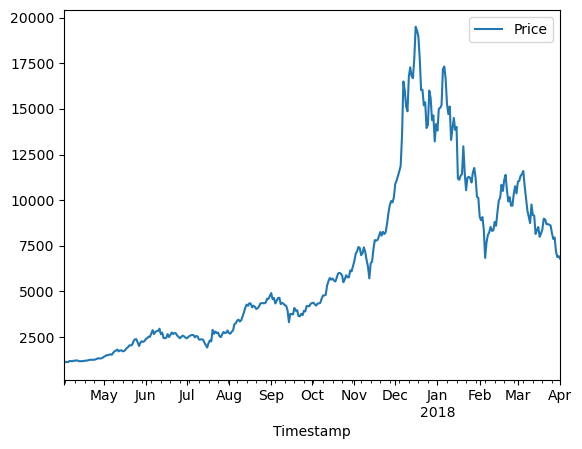

In [19]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

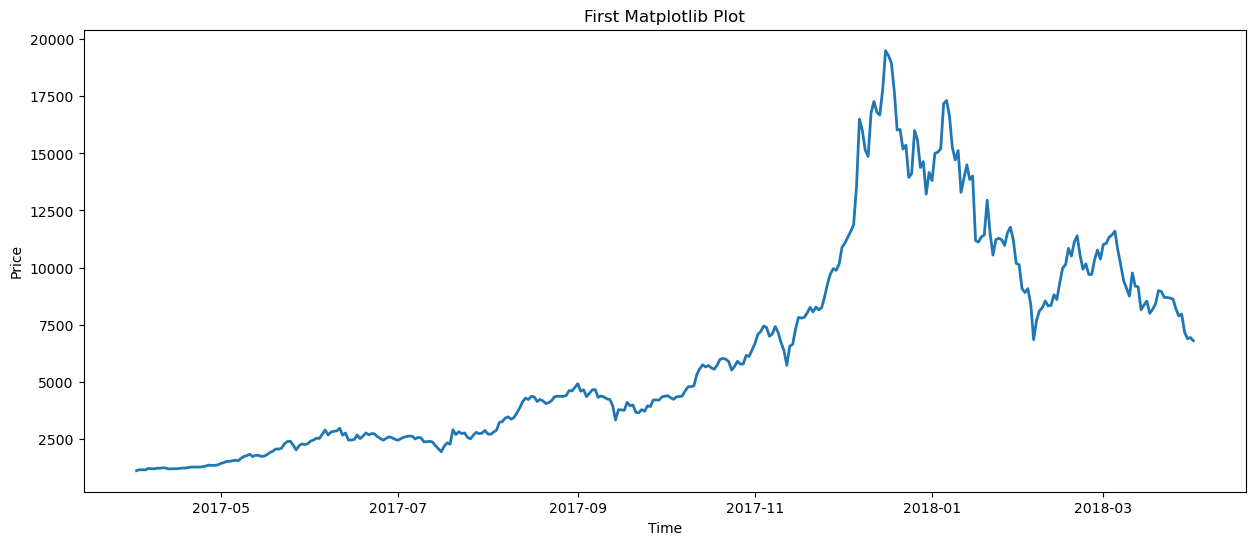

In [20]:
plt.figure(figsize=(15,6))
#plot
plt.plot(df.index,df["Price"], linewidth = 2)
# x
plt.xlabel("Time")
# Y
plt.ylabel("Price")
# Title
plt.title("First Matplotlib Plot")
plt.savefig("first_plot.png")

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

In [21]:
x = np.arange(-10,11)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

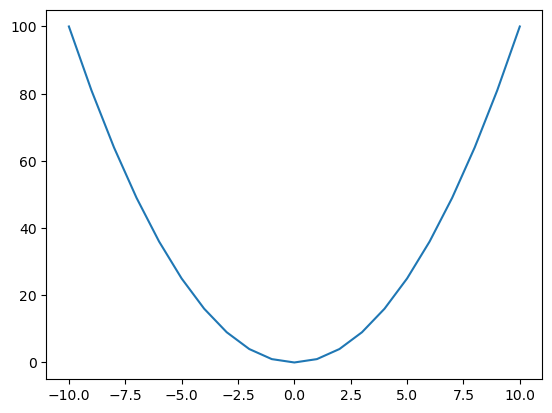

In [22]:
plt.plot(x,x**2)

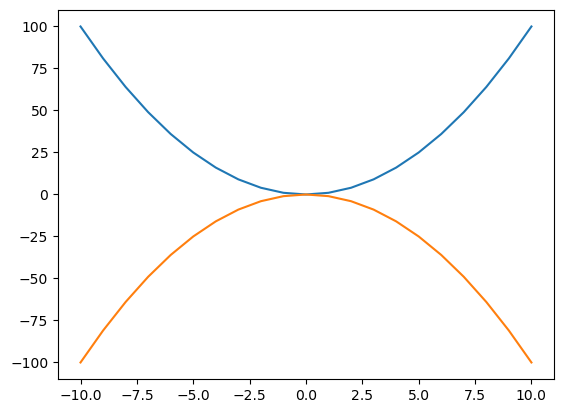

In [23]:
plt.plot(x,x**2)
plt.plot(x,-1*x**2)
plt.show()

We're using `matplotlib`'s global API, which is horrible but it's the most popular one. We'll learn later how to use the _OOP_ API which will make our work much easier.

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

Some of the arguments in `plt.figure` and `plt.plot` are available in the pandas' `plot` interface:

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## A more challenging parsing

To demonstrate plotting two columns together, we'll try to add Ether prices to our `df` DataFrame. The ETH prices data can be found in the `data/eth-price.csv` file. The problem is that it seems like that CSV file was created by someone who really hated programmers. Take a look at it and see how ugly it looks like. We'll still use `pandas` to parse it.

In [24]:
eth = pd.read_csv("eth-price.csv")
eth.dtypes

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object

In [25]:
eth

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23
...,...,...,...
357,3/28/2018,1522195200,445.93
358,3/29/2018,1522281600,383.90
359,3/30/2018,1522368000,393.82
360,3/31/2018,1522454400,394.07


As you can see, it has a `Value` column (which represents the price), a `Date(UTC)` one that has a string representing dates and also a `UnixTimeStamp` date represeting the datetime in unix timestamp format. The header is read automatically, let's try to parse dates with the CSV Reader:

In [26]:
eth = pd.read_csv("eth-price.csv", parse_dates=True)
eth.dtypes

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object

Seems like the `parse_dates` attribute didn't work. We'll need to add a little bit more customization. Let's divide this problem and focus on the problem of "date parsing" first. The simplest option would be to use the `UnixTimeStamp` column. The `pandas` module has a `to_datetime` function that converts Unix timestamps to Datetime objects automatically:

In [27]:
eth["Date(UTC)"] = pd.to_datetime(eth["Date(UTC)"])
eth

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23
...,...,...,...
357,2018-03-28,1522195200,445.93
358,2018-03-29,1522281600,383.90
359,2018-03-30,1522368000,393.82
360,2018-03-31,1522454400,394.07


In [28]:
eth.columns

Index(['Date(UTC)', 'UnixTimeStamp', 'Value'], dtype='object')

In [29]:
eth = eth [['Date(UTC)', 'Value']]
#Set Index
eth.set_index("Date(UTC)",inplace=True)
eth

,Value
Date(UTC),
2017-04-02,48.55
2017-04-03,44.13
2017-04-04,44.43
2017-04-05,44.90
2017-04-06,43.23
...,...
2018-03-28,445.93
2018-03-29,383.90
2018-03-30,393.82


In [30]:
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


In [31]:
prices = pd.DataFrame(index=df.index)
prices

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06
...
2018-03-28
2018-03-29
2018-03-30


In [32]:
prices["Bitcoin"] = df["Price"]
prices["Ether"] = eth["Value"]
prices

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


<Axes: xlabel='Timestamp'>

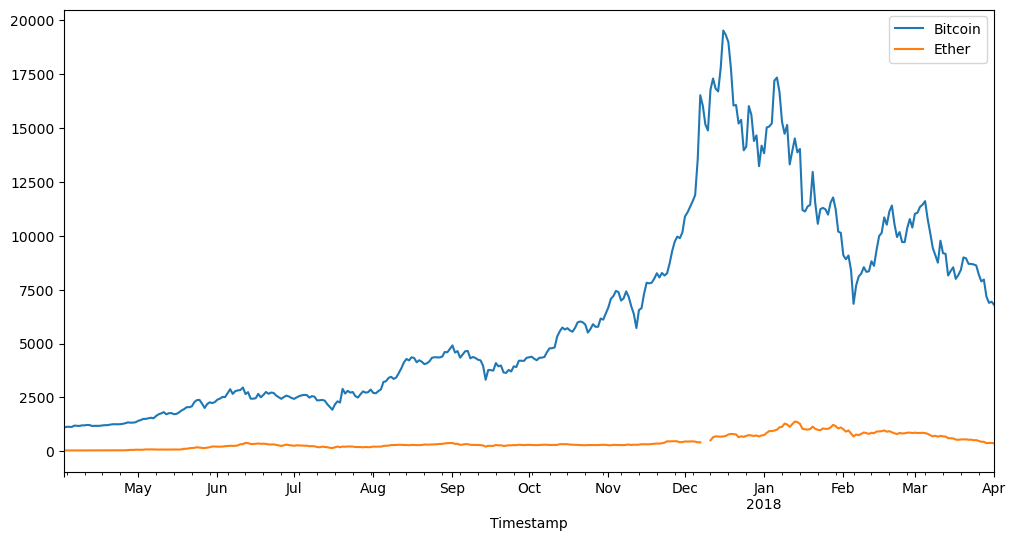

In [33]:
prices.plot(figsize=(12,6))

<Axes: xlabel='Timestamp'>

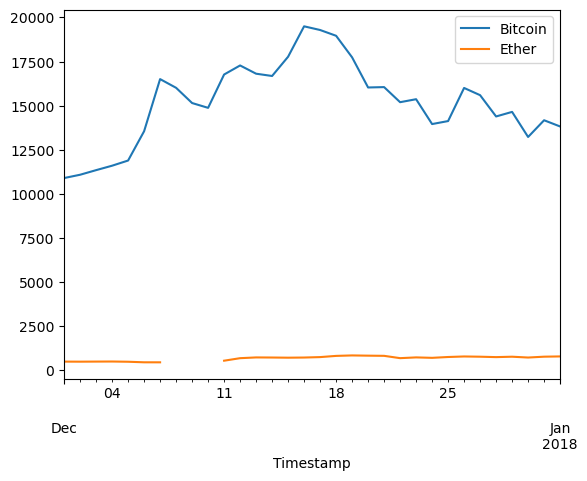

In [34]:
prices.loc["2017-12-01":"2018-01-01"].plot()

In [35]:
null_values = prices[prices["Ether"].isnull()]
#mean value
mean_value = prices[~prices["Ether"].isnull()]
mean_value = mean_value["Ether"].mean()
mean_value

429.9275138121547

In [40]:
prices["Ether"].fillna(prices.loc[~prices["Ether"].isnull(),"Ether"].mean(), inplace=True)


In [41]:
null_values

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [42]:
prices["Ether"].fillna(mean_value, inplace=True)

<Axes: xlabel='Timestamp'>

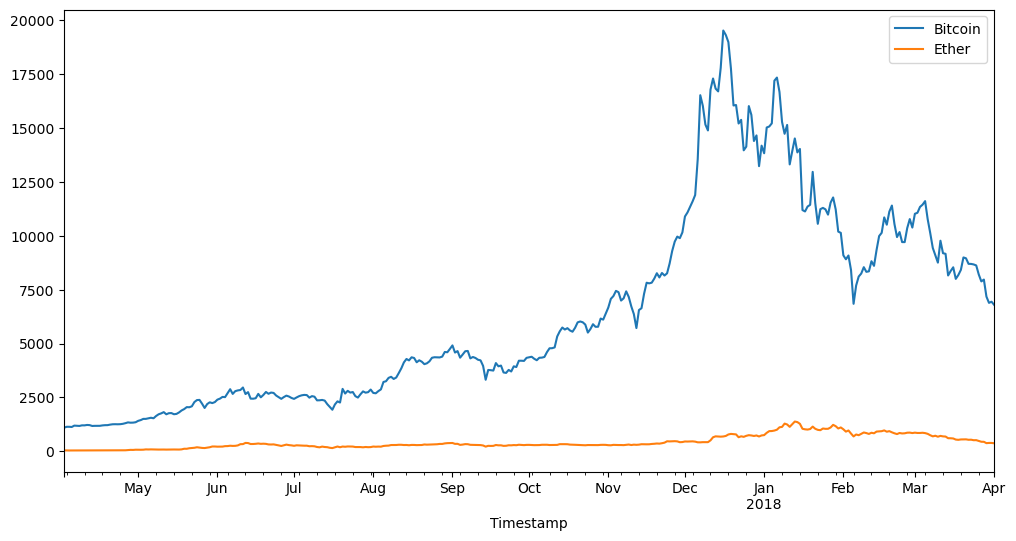

In [43]:
prices.plot(figsize=(12,6))

The problem is the precision of unix timestamps. To match both columns we'll need to use the same index and, our `df` containing Bitcoin prices, is "per day":

We could either, remove the precision of `UnixTimeStamp` or attempt to parse the `Date(UTC)`. Let's do String parsing of `Date(UTC)` for fun:

That seems to work fine! Why isn't it then parsing the `Date(UTC)` column? Simple, the `parse_dates=True` parameter will instruct pandas to parse the index of the `DataFrame`. If you want to parse any other column, you must explicitly pass the column position or name:

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Putting everything together again:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


We can now combine both `DataFrame`s into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty `DataFrame` and with the index from Bitcoin prices:

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06


And we can now just set columns from the other `DataFrame`s:

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


We can now try plotting both values:

<Axes: xlabel='Timestamp'>

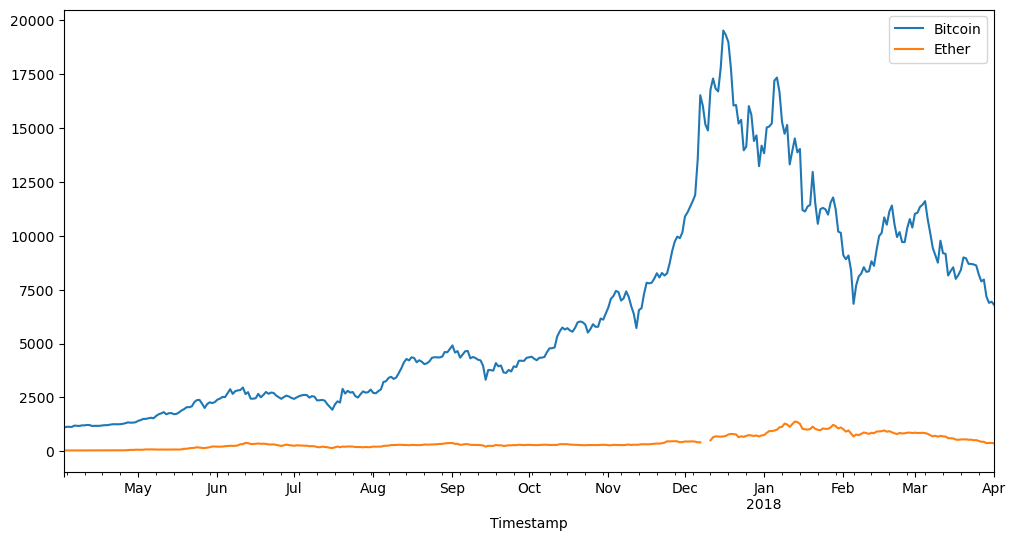

🤔seems like there's a tiny gap between Dec 2017 and Jan 2018. Let's zoom in there:

<Axes: xlabel='Timestamp'>

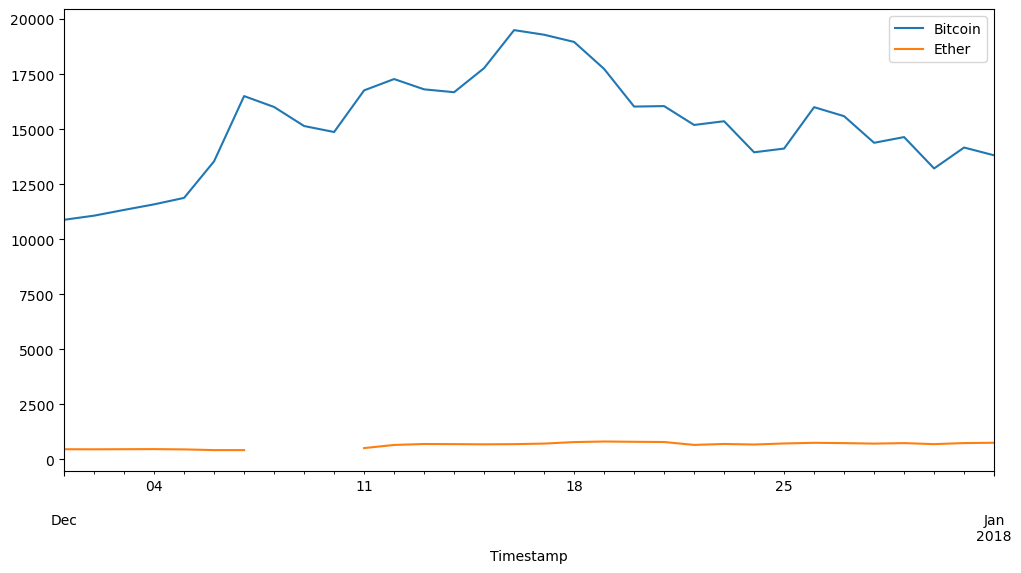

Oh no, missing data 😱. We'll learn how to deal with that later 😉.

Btw, did you note that fancy indexing `'2017-12-01':'2018-01-01'` 😏. That's pandas power 💪. We'll learn how to deal with TimeSeries later too.

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [ ]:
x = "Gabriel"

In [166]:
def check_friendly(number_one,number_two):
    proper_divisor_1 = []
    proper_divisor_2 = []
    #get proper divisor 1
    for i1 in range(1,number_one):
        if number_one%i1 ==0:
            proper_divisor_1.append(i1)
    #get proper divisor 2
    for i2 in range(1,number_two):
        if number_two%i2 ==0:
            proper_divisor_2.append(i2)
    
    #Sum lists
    n1 = sum(proper_divisor_1)
    n2 = sum(proper_divisor_2)
    #check
    if number_one == number_two:
        return f"identical numbers: {number_one}"
    elif n1 == number_two and n2 == number_one:
        return f"{n1} and {n2} are friendly"
    elif n2 != number_one and n1 == number_two:
        return f"sum of divisors of {number_two} is not {number_one} "
    elif n1 != number_two and n2 == number_one:
        return f"sum of divisors of {number_one} is not {number_two} "
    elif n2 != number_one:
        return f"sum of divisors of {number_one} is not {number_two} "

In [167]:
check_friendly(77,77)

'identical numbers: 77'

In [168]:
check_friendly(12,55)

'sum of divisors of 12 is not 55 '

In [169]:
check_friendly(18,21)

'sum of divisors of 21 is not 18 '

In [170]:
check_friendly(220,284)

'284 and 220 are friendly'

<Axes: xlabel='Timestamp'>

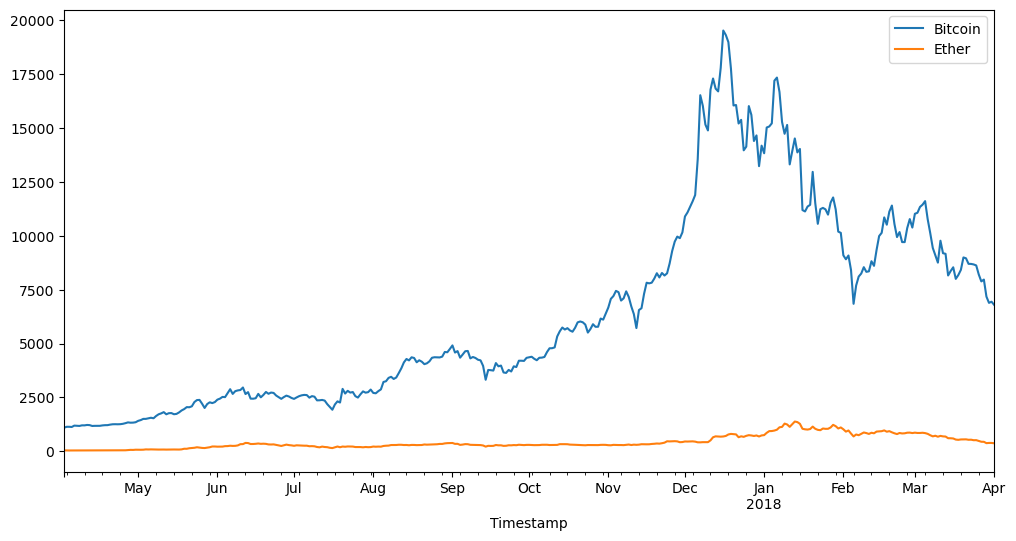

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
